<a href="https://colab.research.google.com/github/Kushaleregowda/Haberman-EDA/blob/main/Haberman_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


from google.colab import files
uploaded = files.upload()


Saving haberman.csv to haberman.csv


#1.1 Importing Packages

In [ ]:
# import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 1.2 Reading the file

In [ ]:
# Read the data from drive and display few records

df= pd.read_csv("haberman.csv")
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## 1.3 Find out dimension and attributes of dataset

In [ ]:
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


# from the above results we can get to know from interesting points
1. Average age of people who got operated. 
2. 0(min) to 52(max) nodes were infected due to cancer 
3. People got operated in between time frame of year 1958 to 1969.

In [ ]:
# to check the rows and columns in the dataset
df.shape

(306, 4)

## data set contains 306 rows and 4 columns 

In [ ]:
# to see the columns and it's datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


# 2.0 Objective
1. What is the age group of people who has undergone surgeries?
2. Which year the no. of operations were more?
3. What is the trend on Year over year operations ?
4. Count of people who survived for more than 5 years?
5. Relationship between Axillary node and Age ?
6. How Axillary node and survival rate is related ?




# 2.1 Data pre-processing and Cleansing

In [ ]:
# to find if there is any missing values in the dataset

df.isnull().sum()


age       0
year      0
nodes     0
status    0
dtype: int64

In [ ]:
# to find if there is any NA in the dataset
df.isna().sum()

age       0
year      0
nodes     0
status    0
dtype: int64

### Observation1 : There are no missing values or NA in the dataset so we are good to proceed with data visualization


# 3.1 Plots 
1. 1D plots
2. 2D plots
3. Scatter plots

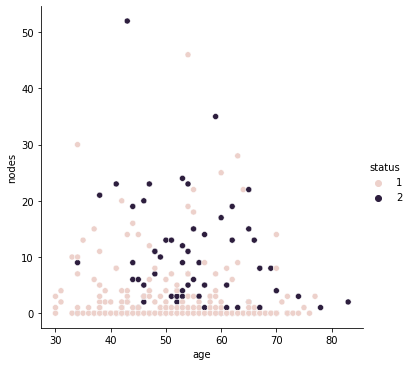

In [ ]:
 # 2d Scatter Plot

sns.relplot( data=df, x='age', y='nodes',hue='status', )

### unable to interpret from the scatter plot above

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


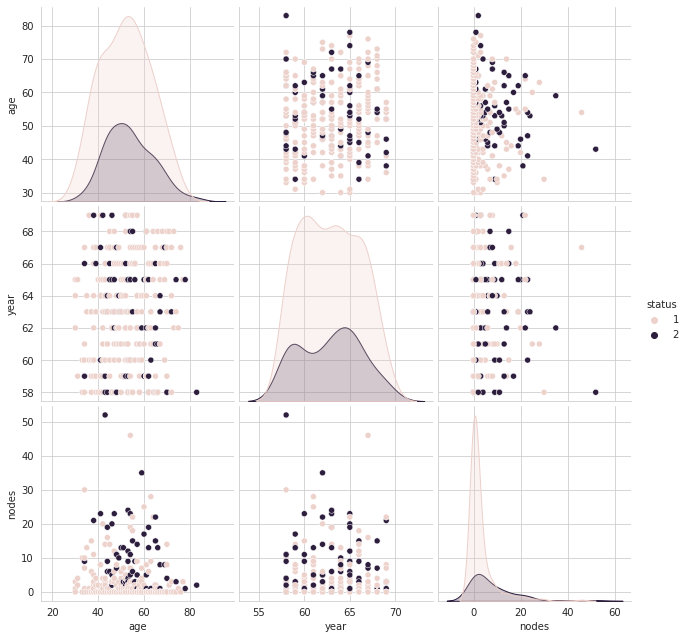

In [ ]:
# pairwise scatter plot: Pair-Plot
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, hue="status", size=3);
plt.show()


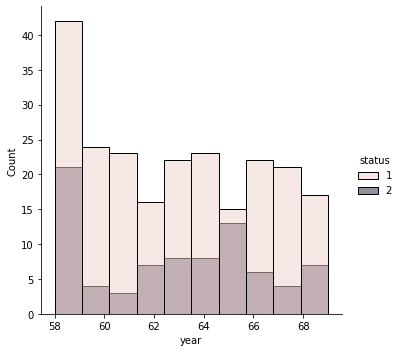

In [ ]:
sns.displot(df, x="year", hue="status")

## From the above dist plot we can infer two important points
1. People  got operated more in initial years and later on started decreasing. Basically the operations count is decreasing over the year.
2. People who got operated survived more than 5 plus years comparatively to the other category.

# From the above regplot we can notice 2 points
1. Age is not a major factor to have more number of lymph nodes failure or detected positive 
2. most of the people of all the age group are having failure nodes ranging between 0 to 5.

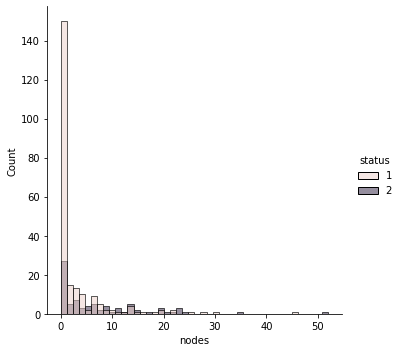

In [ ]:
sns.displot(df, x="nodes", hue="status")

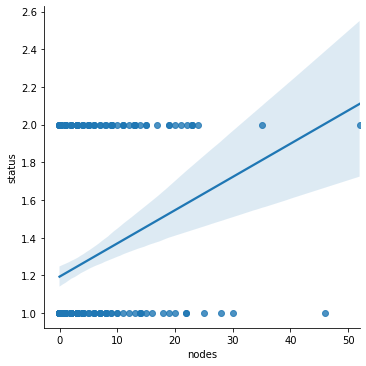

In [ ]:
sns.lmplot(x="nodes", y="status", data=df,x_jitter=.05);

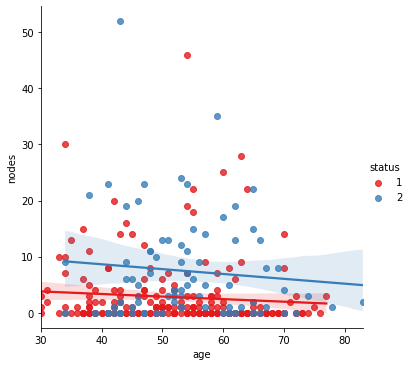

In [ ]:
sns.lmplot(x="age", y="nodes", hue="status", data=df,palette="Set1");

# From the above lmplot we can notice 2 points
1. Age is not a major factor to have more number of lymph nodes failure or detected positive 
2. most of the people are having across the age group are having failure nodes ranging between 0 to 5.

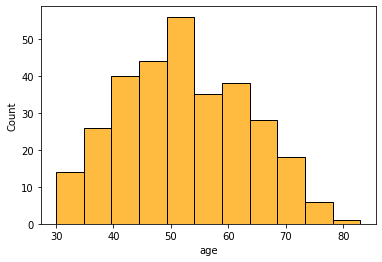

In [ ]:
sns.histplot(data=df, x="age", color="orange")


### From the above histplot we can observe that people who are in the age group of 50-55 are more to get operated

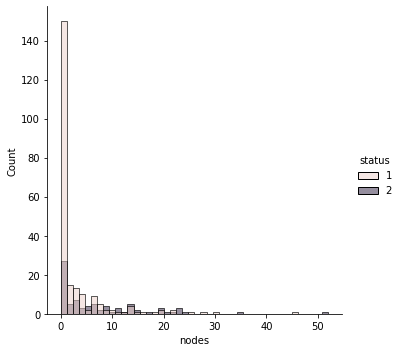

In [ ]:
sns.displot(df, x="nodes", hue="status")

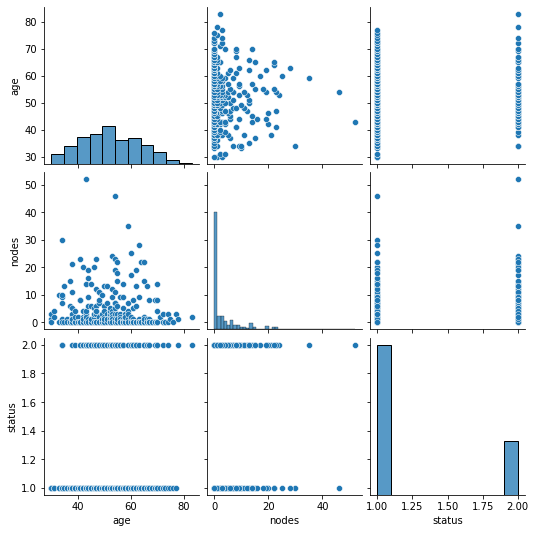

In [ ]:
sns.pairplot(data = df, vars=['age','nodes','status'])
plt.show()

In [ ]:
# Created a new list called age_group and categorize the "age" numerical values into categorical values like "Age_30-50 ( people who's age falls in between 30 to 50"
# "Age_50-70 - for people whose age lies in between 50 to 70 and last one to 70-90"
age_group=[]

for row in df['age']:
  if ( row >= 30 ) and ( row < 50)  : age_group.append('Age_30-50')
  elif ( row >= 50) and ( row < 70) : age_group.append('Age_50-70')
  else: age_group.append('Age_70-90')


In [ ]:
df['age_group']=age_group

In [ ]:
# Created a new list called nodes and categorize the "age" numerical values into categorical values like "Age_30-50 ( people whose age falls in between 30 to 50"
# "Age_50-70 - for people whose age lies in between 50 to 70 and last one to 70-90"print(df)

     age  year  nodes  status  age_group
0     30    64      1       1  Age_30-50
1     30    62      3       1  Age_30-50
2     30    65      0       1  Age_30-50
3     31    59      2       1  Age_30-50
4     31    65      4       1  Age_30-50
..   ...   ...    ...     ...        ...
301   75    62      1       1  Age_70-90
302   76    67      0       1  Age_70-90
303   77    65      3       1  Age_70-90
304   78    65      1       2  Age_70-90
305   83    58      2       2  Age_70-90

[306 rows x 5 columns]


In [ ]:
# Created a new list called nodes_range and categorize the "nodes" numerical values into categorical values like "N_0-10 ( nodes failure range)
# N-0-10 ( for 0 to 10 nodes failure)
# N-10-20 ( for 10 to 20 nodes failure)
# N-20-30 ( for 20 to 30 nodes failure)
# N-30-40 ( for 30 to 40 nodes failure)
# Nodes_40_above ( for 40 nodes and above failure)

nodes_range=[]

for row in df['nodes']:
  if ( row >= 0 ) and ( row < 10) : nodes_range.append('N_0-10')
  elif ( row >= 10) and ( row < 20) : nodes_range.append('N_10-20')
  elif ( row >= 20) and ( row < 30) : nodes_range.append('N_20-30')
  elif ( row >= 30) and ( row < 40) : nodes_range.append('N_30-40')
  else: nodes_range.append('Nodes_40_above')

In [ ]:
df['nodes_range']=nodes_range

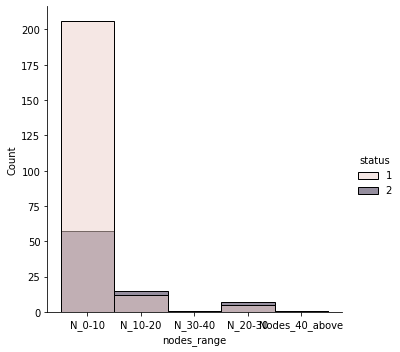

In [ ]:
sns.displot(df, x="nodes_range", hue="status")

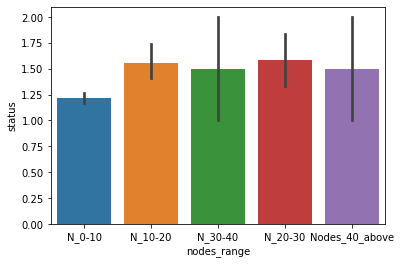

In [ ]:
sns.barplot(x ='nodes_range', y ='status',
data = df)

In [ ]:
df.groupby(['status','nodes_range'])['status'].count()


status  nodes_range   
1       N_0-10            206
        N_10-20            12
        N_20-30             5
        N_30-40             1
        Nodes_40_above      1
2       N_0-10             57
        N_10-20            15
        N_20-30             7
        N_30-40             1
        Nodes_40_above      1
Name: status, dtype: int64

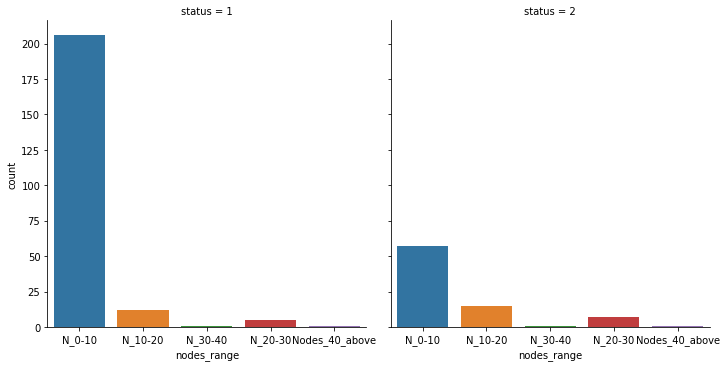

In [ ]:
sns.catplot(x='nodes_range', col='status', kind='count', data=df);

# On further drilling down the dataset we noticed the below points
1. People who got operated lived longer than 5 years plus compared to the other category
2. People who suffered with 0-10 nodes failure are more likely to survive ( 67%) than people who suffered with more nodes failure.
3. People who survived for less  than 5 years counts are more when nodes failure is less
4. Nodes failure is indirectly propotional to survival rate.

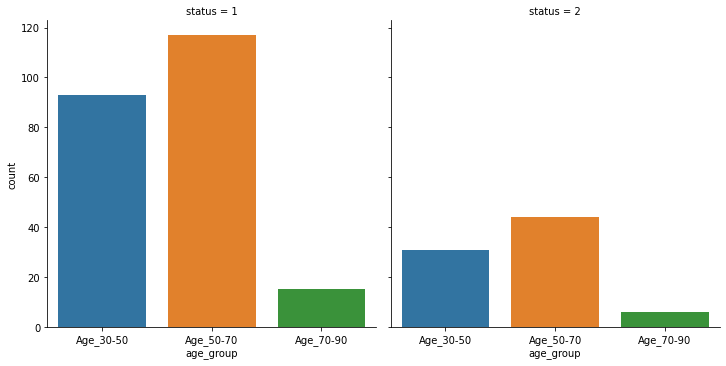

In [ ]:
sns.catplot(x='age_group', col='status', kind='count', data=df);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


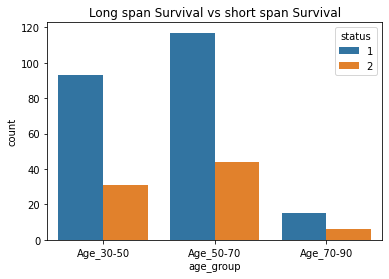

In [ ]:
sns.countplot('age_group', hue='status', data=df)
plt.title('Long span Survival vs short span Survival')
plt.show()

# From the above catplot we can also observe that
1. Age group falling in between 50-70 are more prone to cancer 
2. Percentage of people who got survived longer is also more compared to other category under 50-70 age group

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 42.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 54.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


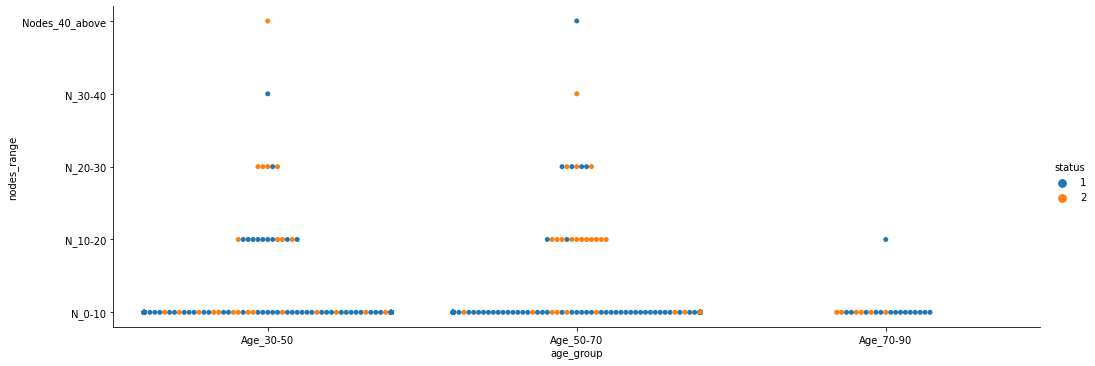

In [ ]:
sns.catplot(x="age_group", y="nodes_range", hue="status",
             aspect=2.9,
            kind="swarm", data=df)

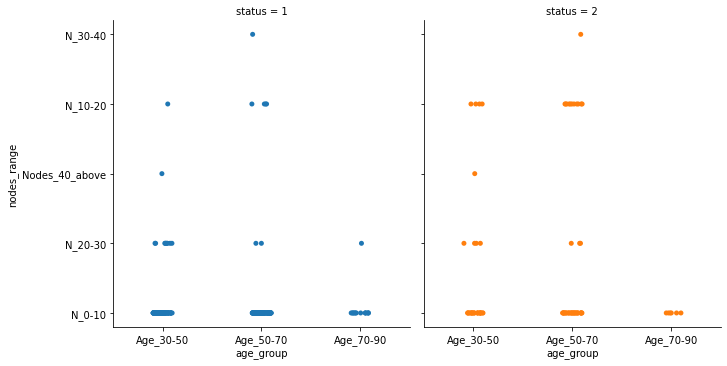

In [ ]:
g = sns.catplot(x="age_group", y="nodes_range", hue="status",
                col="status", data=df)

# Observations from the above catplot
1. Irrespective of Age groups, more number of people who got cancer are having nodes failure between 0-10.
2. Also we can observe that Age and Nodes are not dependent or not having any linear relationship







# Conclusion and Observations


1. People  got operated more in initial years and later on started decreasing. Basically the operations count is decreasing over the year.
2. People who got operated survived more than 5 plus years comparatively to the other category.
3. Age is not a major factor to have more number of lymph nodes failure or detected positive. 
4. most of the people of all the age group are having failure nodes ranging between 0 to 5.
5.People who are in the age group of 50-55 are more to get operated.
6.People who got operated lived longer than 5 years plus compared to the other category.
7.People who suffered with 0-10 nodes failure are more likely to survive ( 67%) than people who suffered with more nodes failure.
8.People who survived for less than 5 years counts are more when nodes failure is less.
9.Nodes failure is indirectly propotional to survival rate. Meaning Less number of nodes failure longer they stay and vice-versa.
10.Irrespective of Age groups, more number of people who got cancer are having nodes failure between 0-10.
11.Age and Nodes are not dependent or not having any linear relationship.
